# Make of a neural network with numpy

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import NetworkModule as nm

C:\Users\trist\AppData\Local\Temp\ipykernel_3232\2838358554.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Using ndarrays as Tensors, adding the typing library to be more explicit and creating a new type "Func" which is a function taking a Tensor as argument and returning a Tensor

In [2]:
from numpy import ndarray as Tensor

from typing import (Tuple, Callable, Sequence)
Func = Callable[[Tensor], Tensor]

### Extracting the data from the dataset

In [3]:
# Number of data points / events taken from the dataset 
# For Training
lines_train: int = 20000
# For Validation and Testing
lines_val: int = 10000

# Different types of dataset for training, validation and testing
dataset_train = pd.read_csv('dataset.csv', usecols=np.arange(0,12), nrows=lines_train)
# The data is normalized to avoid variables with high values
norm_dataset_train = (dataset_train.values - np.min(dataset_train.values)) / (np.max(dataset_train.values) - np.min(dataset_train.values))

dataset_val = pd.read_csv('dataset.csv', usecols=np.arange(0,12), skiprows=lines_train+1, nrows=lines_val)
norm_dataset_val = (dataset_val.values - np.min(dataset_val.values)) / (np.max(dataset_val.values) - np.min(dataset_val.values))

dataset_test = pd.read_csv('dataset.csv', usecols=np.arange(0,12), skiprows=lines_train+lines_val+1, nrows=lines_val)
norm_dataset_test = (dataset_test.values - np.min(dataset_test.values)) / (np.max(dataset_test.values) - np.min(dataset_test.values))

# Labels for training, validation and testing
labels_train = pd.read_csv('dataset.csv', usecols=[13], nrows=lines_train) # labels in column 13
labels_val = pd.read_csv('dataset.csv', usecols=[13], skiprows=lines_train+1, nrows=lines_val)
labels_test = pd.read_csv('dataset.csv', usecols=[13], skiprows=lines_train+lines_val+1, nrows=lines_val)

# New labels for binary classification
# Before : signal has label 0, background has label 1 or 2
# After : signal has label 1, background has label 0
bin_labels_train = np.where(labels_train.values == 0, 1, 0)
bin_labels_val = np.where(labels_val.values == 0, 1, 0)
bin_labels_test = np.where(labels_test.values == 0, 1, 0)

# Predictions from a previous work using the same dataset
article_val = pd.read_csv('dataset.csv', usecols=[12], skiprows=lines_train+1, nrows=lines_val)
article_test = pd.read_csv('dataset.csv', usecols=[12], skiprows=lines_train+lines_val+1, nrows=lines_val)

### Training different networks

In [4]:
seed_value: int = np.random.randint(1, 99) # random seed to initialize the parameters
print(seed_value)
batch_num: int = 1000 # batch_size
epochs: int = 1000 # number of epochs for the training

# Structure of the neural networks : combinaison of linear and activation layers
NetCE = nm.NeuralNet([
    nm.Linear(input_size=12, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=3, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=3, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=1, Seed=seed_value),
    nm.Activation(nm.sigmoid, nm.sigmoid_prime),
])

NetMSE = nm.NeuralNet([
    nm.Linear(input_size=12, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=3, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=3, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=1, Seed=seed_value),
    nm.Activation(nm.sigmoid, nm.sigmoid_prime),
])

35


In [5]:
# Training and validation using the binary cross entropy loss (CE)

Train_res_CE: Tuple = NetCE.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                       val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                       loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=epochs)

Val_res_CE: Tuple = NetCE.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                        loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num))

# Training
Epoch =    0 Loss = 2.364 Acc = 32.295
# Validation
Epoch =    0 Loss = 2.203 Acc = 32.750
--------------------------------------
# Training
Epoch =  100 Loss = 0.319 Acc = 87.790
# Validation
Epoch =  100 Loss = 0.313 Acc = 86.700
--------------------------------------
# Training
Epoch =  200 Loss = 0.208 Acc = 91.590
# Validation
Epoch =  200 Loss = 0.227 Acc = 90.800
--------------------------------------
# Training
Epoch =  300 Loss = 0.176 Acc = 92.925
# Validation
Epoch =  300 Loss = 0.213 Acc = 91.690
--------------------------------------
# Training
Epoch =  400 Loss = 0.147 Acc = 93.735
# Validation
Epoch =  400 Loss = 0.184 Acc = 92.080
--------------------------------------
# Training
Epoch =  500 Loss = 0.137 Acc = 94.220
# Validation
Epoch =  500 Loss = 0.206 Acc = 92.120
--------------------------------------
# Training
Epoch =  600 Loss = 0.150 Acc = 94.530
# Validation
Epoch =  600 Loss = 0.197 Acc = 92.220
--------------------------------------
# Training
Ep

In [6]:
# Training and validation using the mean square error loss (MSE)

Train_res_MSE: Tuple = NetMSE.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                       val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                       loss=nm.MeanSquareError(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=epochs)

Val_res_MSE: Tuple = NetMSE.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                        loss=nm.MeanSquareError(), iterator=nm.BatchIterator(batch_size=batch_num))

# Training
Epoch =    0 Loss = 0.679 Acc = 32.295
# Validation
Epoch =    0 Loss = 3.758 Acc = 32.750
--------------------------------------
# Training
Epoch =  100 Loss = 0.213 Acc = 67.705
# Validation
Epoch =  100 Loss = 0.645 Acc = 67.250
--------------------------------------
# Training
Epoch =  200 Loss = 0.188 Acc = 69.855
# Validation
Epoch =  200 Loss = 0.573 Acc = 68.820
--------------------------------------
# Training
Epoch =  300 Loss = 0.088 Acc = 88.395
# Validation
Epoch =  300 Loss = 0.325 Acc = 87.570
--------------------------------------
# Training
Epoch =  400 Loss = 0.073 Acc = 90.380
# Validation
Epoch =  400 Loss = 0.264 Acc = 89.450
--------------------------------------
# Training
Epoch =  500 Loss = 0.064 Acc = 91.385
# Validation
Epoch =  500 Loss = 0.262 Acc = 90.500
--------------------------------------
# Training
Epoch =  600 Loss = 0.060 Acc = 92.060
# Validation
Epoch =  600 Loss = 0.229 Acc = 90.950
--------------------------------------
# Training
Ep

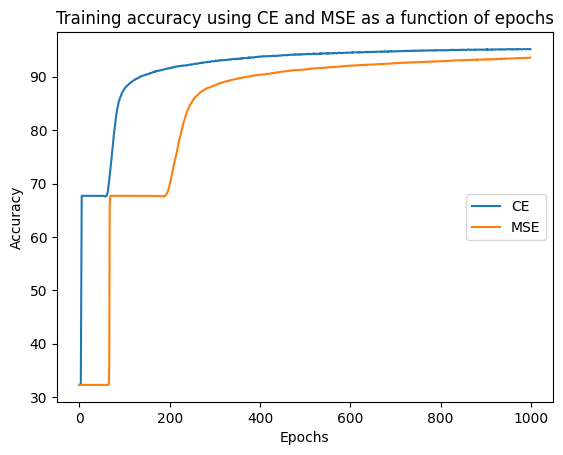

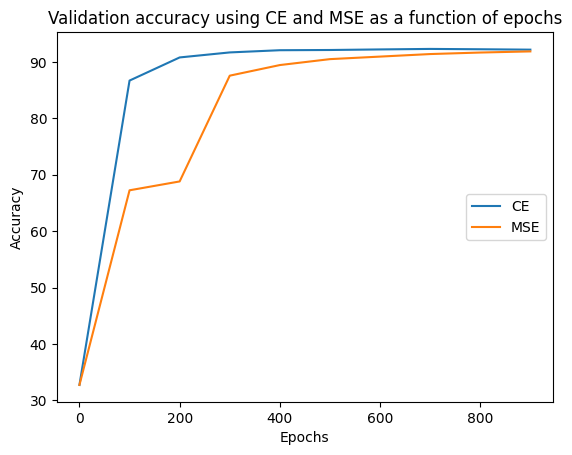

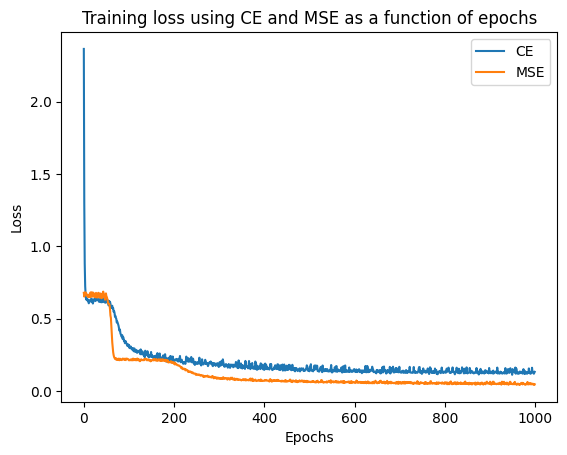

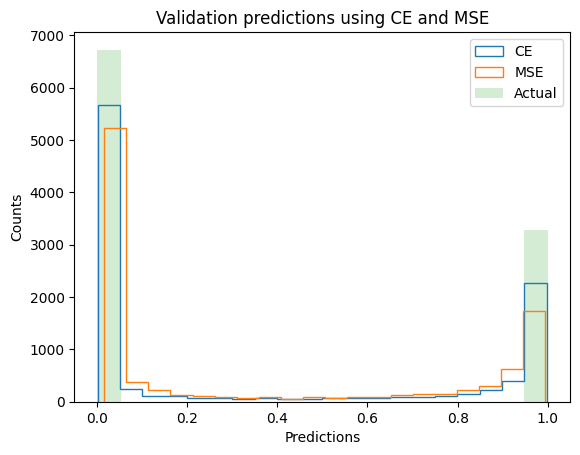

In [25]:
# Plots of training accuracy, validation accuracy, training loss and predictions using CE and MSE

# Training accuracy
fig = plt.figure()
plt.plot(Train_res_CE[1], label='CE')
plt.plot(Train_res_MSE[1], label='MSE')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training accuracy using CE and MSE as a function of epochs')
plt.legend(loc='center right')
fig.savefig('Train_acc_CE_MSE', bbox_inches='tight', dpi=250)
plt.show()

# Validation accuracy
fig = plt.figure()
plt.plot(np.arange(0, epochs, 100), Train_res_CE[5], label='CE')
plt.plot(np.arange(0, epochs, 100), Train_res_MSE[5], label='MSE')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Validation accuracy using CE and MSE as a function of epochs')
plt.legend(loc='center right')
fig.savefig('Val_acc_CE_MSE', bbox_inches='tight', dpi=250)
plt.show()

# Training loss
fig = plt.figure()
plt.plot(Train_res_CE[0], label='CE')
plt.plot(Train_res_MSE[0], label='MSE')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss using CE and MSE as a function of epochs')
plt.legend()
fig.savefig('Train_loss_CE_MSE', bbox_inches='tight', dpi=250)
plt.show()

# Predictions compared to actual labels
fig = plt.figure()
plt.hist(Val_res_CE[3], histtype='step', bins=20, label='CE')
plt.hist(Val_res_MSE[3], histtype='step', bins=20, label='MSE')
plt.hist(Val_res_CE[2], histtype='bar', bins=19, alpha=0.2, label='Actual')
plt.xlabel('Predictions')
plt.ylabel('Counts')
plt.title('Validation predictions using CE and MSE')
plt.legend()
fig.savefig('Val_pred_CE_MSE', bbox_inches='tight', dpi=250)
plt.show()

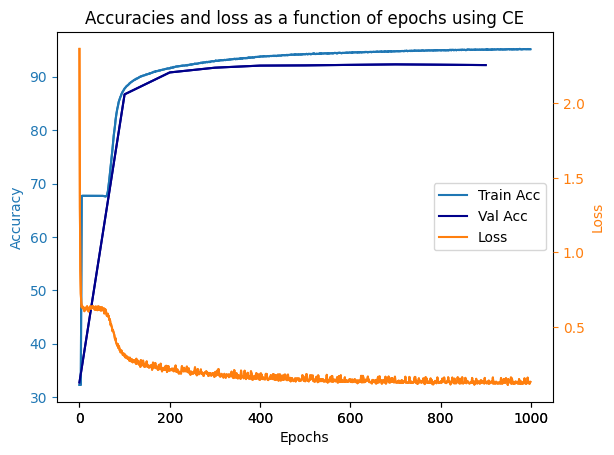

In [28]:
# Plots of training accuracy, validation accuracy and training loss using CE

fig=plt.figure()
ax1=fig.add_subplot(111)
ax2=fig.add_subplot(111, frame_on=False)

ax1.set_title('Accuracies and loss as a function of epochs using CE')

ax1.plot(Train_res_CE[1], color='C0')
ax1.plot(np.arange(0, epochs, 100), Train_res_CE[5], color = 'darkblue')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='C0')
ax1.tick_params(axis='y', colors='C0')

ax2.plot(Train_res_CE[0], color='C1') 
ax2.set_ylabel('Loss', color='C1') 
ax2.yaxis.set_label_position('right') 
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', colors='C1')

l1,=ax1.plot(Train_res_CE[1], color='C0')
l2,=ax1.plot(np.arange(0, epochs, 100), Train_res_CE[5], color='darkblue')
l3,=ax2.plot(Train_res_CE[0], color='C1')
plt.legend([l1, l2, l3], ['Train Acc', 'Val Acc', 'Loss'], loc='center right')

fig.savefig('Acc_loss_CE', bbox_inches='tight', dpi=250)
plt.show()

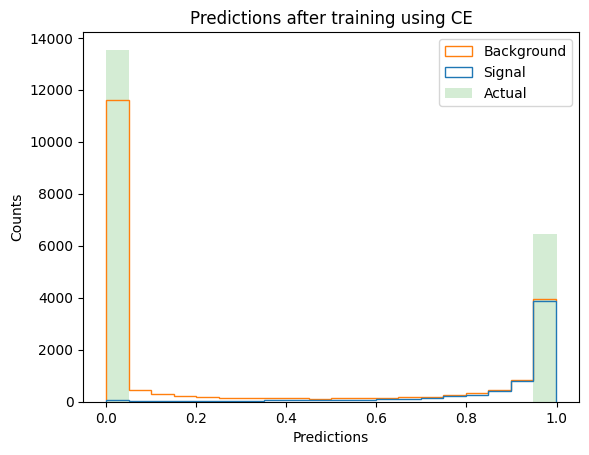

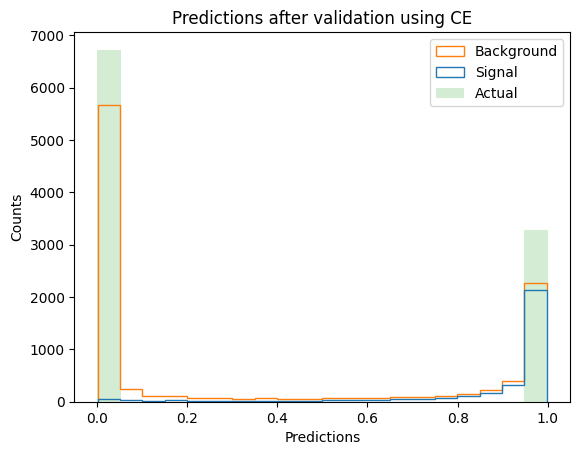

In [29]:
# Plots of predictions after training and validation with separation of signal and background using CE

# Separate signal and background events for training
Pred_back_t: Sequence = []
Pred_sig_t: Sequence = []

for i in range(0, len(Train_res_CE[2])):
    if Train_res_CE[2][i] == 0:
        Pred_back_t.append(Train_res_CE[3][i][0])
    else:
        Pred_sig_t.append(Train_res_CE[3][i][0])

Pred_back_t_arr = np.array(Pred_back_t)
Pred_sig_t_arr = np.array(Pred_sig_t)

# Separate signal and background events for validation
Pred_back: Sequence = []
Pred_sig: Sequence = []

for i in range(0, len(Val_res_CE[2])):
    if Val_res_CE[2][i] == 0:
        Pred_back.append(Val_res_CE[3][i][0])
    else:
        Pred_sig.append(Val_res_CE[3][i][0])

Pred_back_arr = np.array(Pred_back)
Pred_sig_arr = np.array(Pred_sig)

# Training predictions
fig = plt.figure()
plt.hist([Pred_sig_t_arr, Pred_back_t_arr], histtype='step', stacked=True, bins=20,
         label=['Signal', 'Background'])
plt.hist(Train_res_CE[2], histtype='bar', bins=19, alpha=0.2, label='Actual')
plt.xlabel('Predictions')
plt.ylabel('Counts')
plt.title('Predictions after training using CE')
plt.legend()
fig.savefig('Train_pred_CE', bbox_inches='tight', dpi=250)
plt.show()

# Validation predictions
fig = plt.figure()
plt.hist([Pred_sig_arr, Pred_back_arr], histtype='step', stacked=True, bins=20,
         label=['Signal', 'Background'])
plt.hist(Val_res_CE[2], histtype='bar', bins=19, alpha=0.2, label='Actual')
plt.xlabel('Predictions')
plt.ylabel('Counts')
plt.title('Predictions after validation using CE')
plt.legend()
fig.savefig('Val_pred_CE', bbox_inches='tight', dpi=250)
plt.show()

### Assessing a good cut value for accuracy computation

In [10]:
# Cut : value between 0 and 1 determining which predictions are signal or background
# For example, with a cut of 0.2, all predictions above 0.2 are considered signal, the other background

cut_range = np.arange(0.1, 1, 0.1)

Acc_cut_tot: Sequence = []
Acc_cut_back: Sequence = []
Acc_cut_sig: Sequence = []
Acc_cut_article: Sequence = []

# Training and validation for every cut value
for cut in cut_range:
    
    net_c = nm.NeuralNet([
        nm.Linear(input_size=12, output_size=9, Seed=seed_value),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=3, Seed=seed_value),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=3, output_size=9, Seed=seed_value),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=1, Seed=seed_value),
        nm.Activation(nm.sigmoid, nm.sigmoid_prime),
    ])

    Train_res_c: Tuple = net_c.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                    val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                    loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=epochs, cut=cut, Print=False)

    Val_res_c: Tuple = net_c.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                            loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), cut=cut)
    
    Actual_back: Sequence = []
    Pred_back: Sequence = []
    Actual_sig: Sequence = []
    Pred_sig: Sequence = []

    # Separate signal and background events
    for i in range(0, len(Val_res_c[2])):
        if Val_res_c[2][i] == 0:
            Actual_back.append(Val_res_c[2][i])
            Pred_back.append(Val_res_c[3][i])
        else:
            Actual_sig.append(Val_res_c[2][i])
            Pred_sig.append(Val_res_c[3][i])

    Actual_back_arr = np.array(Actual_back)
    Pred_back_arr = np.array(Pred_back)
    Actual_sig_arr = np.array(Actual_sig)
    Pred_sig_arr = np.array(Pred_sig)

    # Compute accuracy for signal and background
    Round_back = np.where(Pred_back_arr >= cut, 1, 0)
    Round_sig = np.where(Pred_sig_arr >= cut, 1, 0)
    Acc_back = np.mean(Round_back==Actual_back_arr) * 100
    Acc_sig = np.mean(Round_sig==Actual_sig_arr) * 100
    
    Round_article = np.where(article_val.values >= cut, 1, 0)
    Acc_article_val = np.mean(Round_article==bin_labels_val) * 100

    Acc_cut_tot.append(Val_res_c[1])
    Acc_cut_back.append(Acc_back)
    Acc_cut_sig.append(Acc_sig)
    Acc_cut_article.append(Acc_article_val)

    print(f'Cut = {cut:.1f}')
    print(f'Acc = {Val_res_c[1]:.3f} Acc back = {Acc_back:.3f} Acc sig = {Acc_sig:.3f}')
    print(f'Acc article = {Acc_article_val:.3f}')
    print("-----------------------------------------------")

Cut = 0.1
Acc = 89.860 Acc back = 86.305 Acc sig = 97.160
Acc article = 93.620
-----------------------------------------------
Cut = 0.2
Acc = 91.040 Acc back = 88.773 Acc sig = 95.695
Acc article = 90.410
-----------------------------------------------
Cut = 0.3
Acc = 91.640 Acc back = 90.305 Acc sig = 94.382
Acc article = 87.030
-----------------------------------------------
Cut = 0.4
Acc = 92.140 Acc back = 91.524 Acc sig = 93.405
Acc article = 83.910
-----------------------------------------------
Cut = 0.5
Acc = 92.390 Acc back = 92.565 Acc sig = 92.031
Acc article = 80.530
-----------------------------------------------
Cut = 0.6
Acc = 92.480 Acc back = 93.651 Acc sig = 90.076
Acc article = 77.770
-----------------------------------------------
Cut = 0.7
Acc = 92.400 Acc back = 94.736 Acc sig = 87.603
Acc article = 74.930
-----------------------------------------------
Cut = 0.8
Acc = 91.760 Acc back = 95.688 Acc sig = 83.695
Acc article = 72.360
--------------------------------

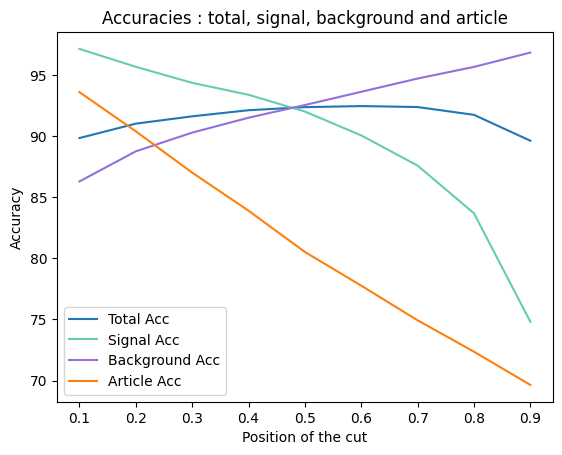

In [30]:
# Plots of the total, signal and background validation accuracies compared to the article accuracy

fig = plt.figure()
plt.plot(cut_range, Acc_cut_tot, label='Total Acc')
plt.plot(cut_range, Acc_cut_sig, label='Signal Acc', color='mediumaquamarine')
plt.plot(cut_range, Acc_cut_back, label='Background Acc', color='mediumpurple')
plt.plot(cut_range, Acc_cut_article, label='Article Acc')
plt.title('Accuracies : total, signal, background and article')
plt.xlabel('Position of the cut')
plt.ylabel('Accuracy')
plt.legend()
fig.savefig('All_accu', bbox_inches='tight', dpi=250)
plt.show()

Round_article_test = np.where(article_test.values >= 0.1, 1, 0)
Acc_article = np.mean(Round_article_test==bin_labels_test) * 100

### Ploting the signal against background distribution for specific input variables

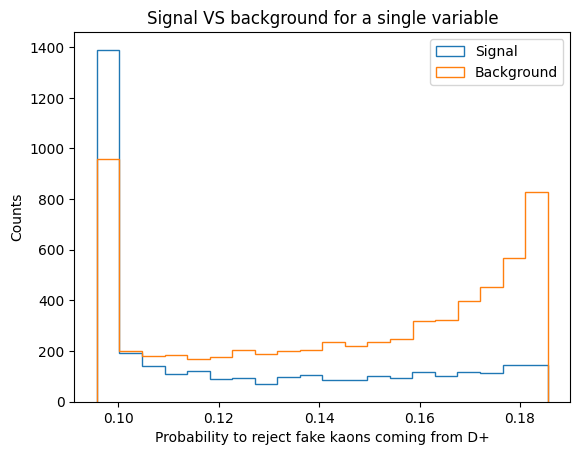

In [31]:
# Plot to assess whether a physical variable allows to discriminate signal and background or not

In_back: Sequence = []
In_sig: Sequence = []

num_col = 6
datacol = ['Sum of extra-photon energy', 'Number of extra tracks', 'Sum of missing momentum and energy',
           'cos(thrust axis of the signal kaon, thrust axis of other objects)', 'Modified Fox-Wolfram moment Hso_22', 'Recoil mass',
           'Probability to reject fake kaons coming from D+', 'Signal probability for the Btag', 'Modified Fox-Wolfram moment Hso_02',
           'Modified Fox-Wolfram moment Hoo_0', 'Probability to reject fake kaons coming from D0', 'Azimuthal angle between signal kaon and missing-momentum vector']

# Separate signal and background events
for i in range(0, len(Val_res_CE[3])):
    if np.round(Val_res_CE[3][i]) == 0:
        In_back.append(Val_res_CE[4][i])
    else:
        In_sig.append(Val_res_CE[4][i])

In_back_arr = np.array(In_back)
In_sig_arr = np.array(In_sig)

fig = plt.figure()
plt.hist(In_sig_arr[:, num_col], histtype='step', bins=20, label='Signal')
plt.hist(In_back_arr[:, num_col], histtype='step', bins=20, label='Background')
plt.title('Signal VS background for a single variable')
plt.xlabel(datacol[num_col])
plt.ylabel('Counts')
plt.legend()
fig.savefig('Sig_back_variable', bbox_inches='tight', dpi=250)
plt.show()

### Final test accuracy

In [32]:
# Final test to compare the accuracy of our network and the one from the article

Acc_tot: Sequence = []
Acc_back_tot: Sequence = []
Acc_sig_tot: Sequence =[]
Loss_tot: Sequence = []
Pred_tot: Sequence = []

# Compute the accuracy for different random initializations
for N in range(10):

    net = nm.NeuralNet([
        nm.Linear(input_size=12, output_size=9),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=3),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=3, output_size=9),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=1),
        nm.Activation(nm.sigmoid, nm.sigmoid_prime),
    ])

    Train_res: Tuple = net.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                    val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                    loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=500, cut=0.1, Print=False)
   
    # Using the test dataset and a specific cut value
    Test_res: Tuple = net.validate(inputs=norm_dataset_test, targets=bin_labels_test,
                                            loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), cut=0.1)
    
    Actual_back: Sequence = []
    Pred_back: Sequence = []
    Actual_sig: Sequence = []
    Pred_sig: Sequence = []

    # Separate signal and background events
    for i in range(0, len(Test_res[2])):
        if Test_res[2][i] == 0:
            Actual_back.append(Test_res[2][i])
            Pred_back.append(Test_res[3][i])
        else:
            Actual_sig.append(Test_res[2][i])
            Pred_sig.append(Test_res[3][i])

    Actual_back_arr = np.array(Actual_back)
    Pred_back_arr = np.array(Pred_back)
    Actual_sig_arr = np.array(Actual_sig)
    Pred_sig_arr = np.array(Pred_sig)

    # Compute accuracy for signal and background
    Round_back = np.where(Pred_back_arr >= 0.1, 1, 0)
    Round_sig = np.where(Pred_sig_arr >= 0.1, 1, 0)
    Acc_back = np.mean(Round_back==Actual_back_arr) * 100
    Acc_sig = np.mean(Round_sig==Actual_sig_arr) * 100
    
    Acc_tot.append(Test_res[1])
    Acc_back_tot.append(Acc_back)
    Acc_sig_tot.append(Acc_sig)
    Loss_tot.append(Test_res[0])
    Pred_tot.append(Test_res[3])

    # Print accuracies for each iteration
    print(f'Acc = {Test_res[1]:.3f} Acc back = {Acc_back:.3f} Acc sig = {Acc_sig:.3f}')


Acc_back_arr = np.array(Acc_back_tot)
Acc_sig_arr = np.array(Acc_sig_tot)
Acc_array = np.array(Acc_tot)

# Compute the final accuracies as the mean on the iterations
Acc_final = np.mean(Acc_array)
Acc_back_final = np.mean(Acc_back_arr)
Acc_sig_final = np.mean(Acc_sig_arr)

print("---------------------Means---------------------")
print(f'Acc = {Acc_final:.3f} Acc back = {Acc_back_final:.3f} Acc sig = {Acc_sig_final:.3f}')
print(f'Acc article = {Acc_article:.3f}')

Acc = 92.150 Acc back = 89.883 Acc sig = 96.903
Acc = 85.940 Acc back = 79.575 Acc sig = 99.288
Acc = 91.580 Acc back = 89.440 Acc sig = 96.067
Acc = 91.900 Acc back = 89.839 Acc sig = 96.222
Acc = 92.980 Acc back = 93.428 Acc sig = 92.041
Acc = 91.960 Acc back = 89.928 Acc sig = 96.222
Acc = 93.220 Acc back = 92.748 Acc sig = 94.209
Acc = 92.120 Acc back = 90.459 Acc sig = 95.602
Acc = 86.560 Acc back = 80.535 Acc sig = 99.195
Acc = 92.860 Acc back = 93.546 Acc sig = 91.421
---------------------Means---------------------
Acc = 91.127 Acc back = 88.938 Acc sig = 95.717
Acc article = 94.060
